In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

In [2]:
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Custom colors for country visualization
country_colors = {
    "Bangladesh": "#003f5c",
    "United States": "#2f4b7c",
    "United Kingdom": "#665191",
    "Canada": "#a05195",
    "Australia": "#d45087",
    "Malaysia": "#f95d6a",
    "Sri Lanka": "#ff7c43",
    "China": "#ffa600",
    "Germany": "#7F2CCB",
    "France": "#00CC96",
    "Japan": "#EF553B",
    "Singapore": "#636EFA",
    "Nepal": "#AB63FA",
    "Russia": "#19D3F3",
    "Korea": "#FD3216",
    "Thailand": "#FF9DA6"
}

In [5]:
filepath = "Top 10 Country FFA.csv"
df = pd.read_csv(filepath)
df.set_index('year', inplace=True)
df

,top1_country,top1_ftas,top2_country,top2_ftas,top3_country,top3_ftas,top4_country,top4_ftas,top5_country,top5_ftas,top6_country,top6_ftas,top7_country,top7_ftas,top8_country,top8_ftas,top9_country,top9_ftas,top10_country,top10_ftas
year,,,,,,,,,,,,,,,,,,,,
2014,United States,1118983,Bangladesh,942562,United Kingdom,838860,Sri Lanka,301601,Russian Fed.,269832,Canada,268485,Malaysia,262026,France,246101,Australia,239762,Germany,239106
2015,United States,1213624,Bangladesh,1133879,United Kingdom,867601,Sri Lanka,299513,Canada,281306,Malaysia,272941,Australia,263101,Germany,248314,France,230854,Japan,207415
2016,Bangladesh,1380409,United States,1296939,United Kingdom,941883,Canada,317239,Malaysia,301961,Sri Lanka,297418,Australia,293625,Germany,265928,China,251313,France,238707
2017,Bangladesh,2156557,United States,1376919,United Kingdom,986296,Canada,335439,Australia,324243,Malaysia,322126,Sri Lanka,303590,Russian Fed.,278904,Germany,269380,France,249620
2018,Bangladesh,2256675,United States,1456678,United Kingdom,1029758,Sri Lanka,353684,Canada,351040,Australia,346486,Malaysia,319172,China,281768,Germany,274087,Russian Fed.,262309
2019,Bangladesh,2577727,United States,1512032,United Kingdom,1000292,Australia,367241,Canada,351859,China,339442,Malaysia,334579,Sri Lanka,330861,Germany,264973,Russian Fed.,251319
2020,Bangladesh,549273,United States,394092,United Kingdom,291874,Canada,122868,Russian Fed.,102166,Australia,86758,France,74243,Germany,72558,Malaysia,69897,Sri Lanka,68646


In [6]:
data_list = []

# Iterate through each year
for year in df.index:
    # Iterate through each country rank
    for i in range(1, 11):
        country = df.loc[year, f'top{i}_country']
        ftas = df.loc[year, f'top{i}_ftas']
        
        # Add to data list
        data_list.append({
            'year': year,
            'rank': i,
            'country': country,
            'ftas': ftas
        })

# Create a new DataFrame from the list
df_long = pd.DataFrame(data_list)
df_long

,year,rank,country,ftas
0,2014,1,United States,1118983
1,2014,2,Bangladesh,942562
2,2014,3,United Kingdom,838860
3,2014,4,Sri Lanka,301601
4,2014,5,Russian Fed.,269832
...,...,...,...,...
65,2020,6,Australia,86758
66,2020,7,France,74243
67,2020,8,Germany,72558
68,2020,9,Malaysia,69897


<Figure size 1600x1000 with 0 Axes>

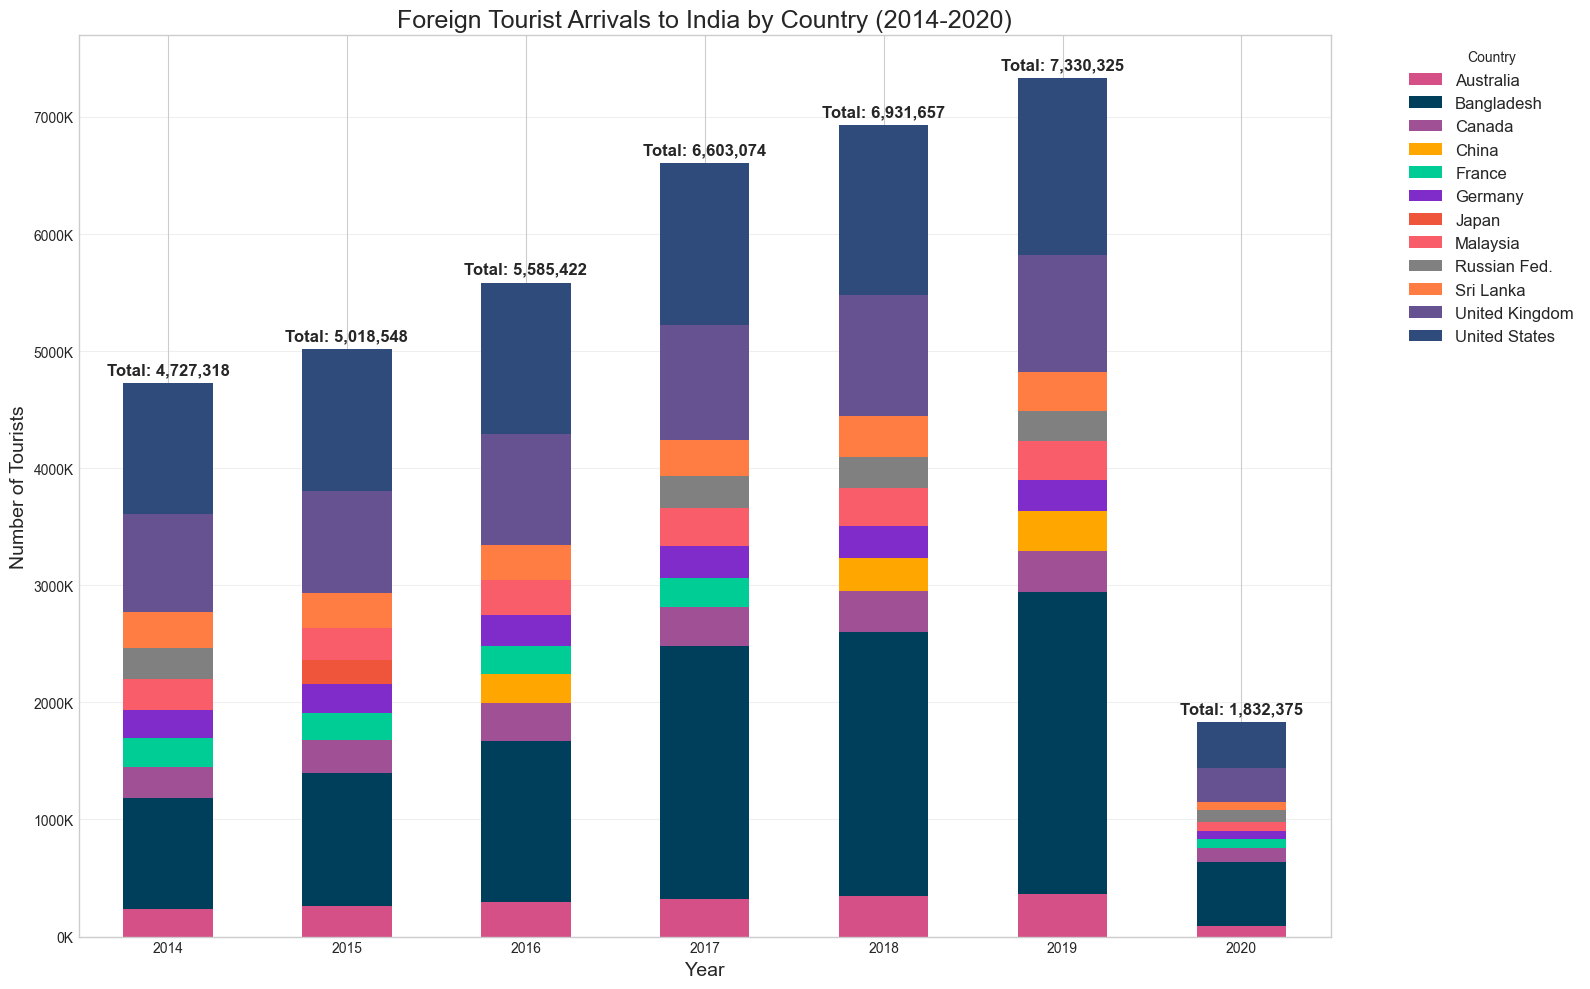

In [8]:
plt.figure(figsize=(16, 10))

# Pivot the long-form data to get countries as columns
pivot_df = df_long.pivot_table(index='year', columns='country', values='ftas', aggfunc='sum')

# Get the relevant colors for each country
colors = [country_colors.get(country, "#808080") for country in pivot_df.columns]

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(16, 10), color=colors)

plt.title('Foreign Tourist Arrivals to India by Country (2014-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tourists', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Format y-axis to show values in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

# Add a text annotation with the total for each year
for i, year in enumerate(pivot_df.index):
    total = pivot_df.loc[year].sum()
    plt.text(i, total + 50000, f'Total: {total:,.0f}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('top10_countries_stacked_bar.png', dpi=300)
plt.show()

In [10]:
all_countries = []
for i in range(1, 11):
    all_countries.extend(df[f'top{i}_country'].unique())

unique_countries = sorted(list(set(all_countries)))
print(f"\nTotal unique countries that appeared in the top 10: {len(unique_countries)}")
print(f"Unique countries: {unique_countries}")

# Find countries that consistently appeared in the top 10 across all years
consistent_countries = []
for country in unique_countries:
    # Check if the country appears in at least one rank for all years
    if all(country in df.loc[year].values for year in df.index):
        consistent_countries.append(country)

print(f"\n2. Countries that consistently appeared in the top 10 across all years ({len(consistent_countries)}):")
print(consistent_countries)

# Calculate total FTAs for each year from the top 10 countries
yearly_totals = {}
for year in df.index:
    yearly_totals[year] = sum(df.loc[year, f'top{i}_ftas'] for i in range(1, 11))

print("\n3. Total FTAs from top 10 countries by year:")
for year, total in yearly_totals.items():
    print(f"{year}: {total:,} tourists")


Total unique countries that appeared in the top 10: 12
Unique countries: ['Australia', 'Bangladesh', 'Canada', 'China', 'France', 'Germany', 'Japan', 'Malaysia', 'Russian Fed.', 'Sri Lanka', 'United Kingdom', 'United States']

2. Countries that consistently appeared in the top 10 across all years (8):
['Australia', 'Bangladesh', 'Canada', 'Germany', 'Malaysia', 'Sri Lanka', 'United Kingdom', 'United States']

3. Total FTAs from top 10 countries by year:
2014: 4,727,318 tourists
2015: 5,018,548 tourists
2016: 5,585,422 tourists
2017: 6,603,074 tourists
2018: 6,931,657 tourists
2019: 7,330,325 tourists
2020: 1,832,375 tourists


In [11]:
analysis_results = {
    'unique_countries': unique_countries,
    'consistent_countries': consistent_countries,
    'yearly_totals': yearly_totals
}

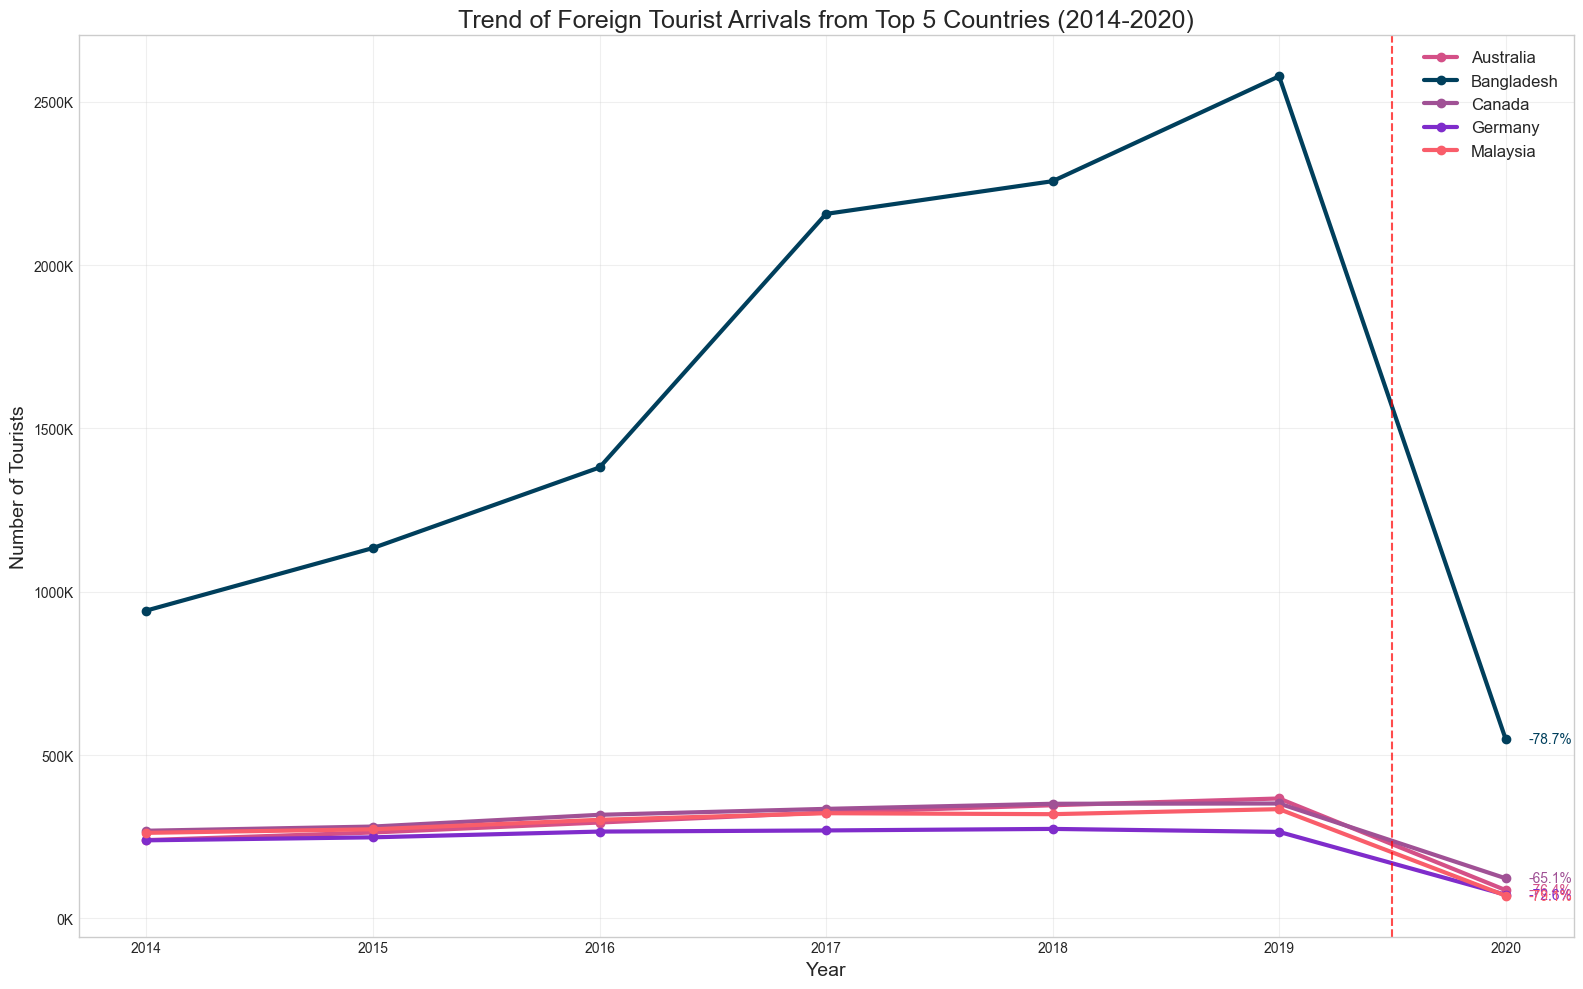

In [12]:
plt.figure(figsize=(16, 10))

# Get top 5 consistent countries
top_countries = analysis_results['consistent_countries'][:5]

# Create a filtered dataframe with only these countries
filtered_df = df_long[df_long['country'].isin(top_countries)]

# Pivot to get one line per country
trend_df = filtered_df.pivot_table(index='year', columns='country', values='ftas', aggfunc='sum')

# Plot each country
for country in top_countries:
    if country in trend_df.columns:
        plt.plot(trend_df.index, trend_df[country], marker='o', linewidth=3, 
                    label=country, color=country_colors.get(country, "#808080"))

plt.title('Trend of Foreign Tourist Arrivals from Top 5 Countries (2014-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tourists', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format y-axis to show values in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

# Add a vertical line to mark pre-COVID and COVID periods if 2020 is in the data
if 2020 in trend_df.index:
    plt.axvline(x=2019.5, color='r', linestyle='--', alpha=0.7, label='COVID-19 Impact')
    
    # Annotate the COVID drop
    for country in top_countries:
        if country in trend_df.columns and 2019 in trend_df.index and 2020 in trend_df.index:
            pct_change = ((trend_df.loc[2020, country] / trend_df.loc[2019, country]) - 1) * 100
            plt.annotate(f'{pct_change:.1f}%', 
                        xy=(2020, trend_df.loc[2020, country]), 
                        xytext=(2020.1, trend_df.loc[2020, country]),
                        fontsize=10, ha='left', va='center',
                        color=country_colors.get(country, "#808080"))

plt.tight_layout()
plt.savefig('top5_countries_trend.png', dpi=300)
plt.show()

<Figure size 1600x1200 with 0 Axes>

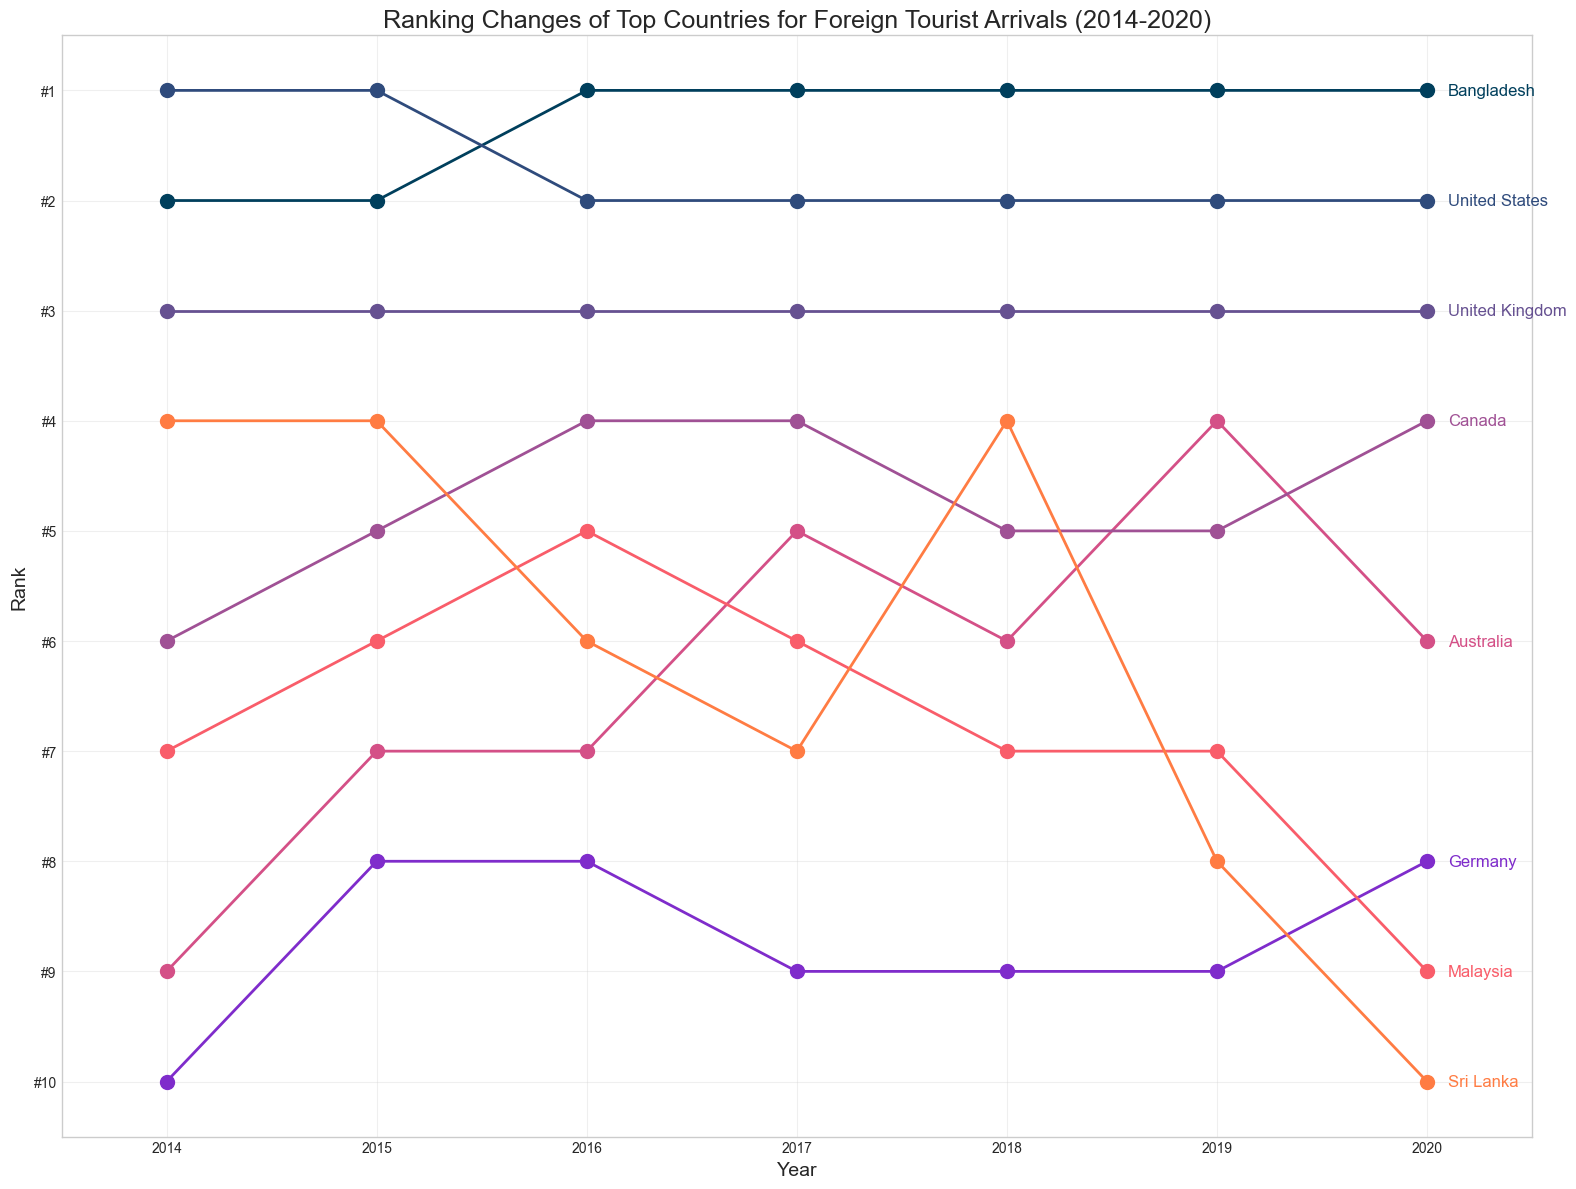

In [13]:
plt.figure(figsize=(16, 12))

# Select countries for analysis (use consistent countries)
selected_countries = analysis_results['consistent_countries'][:8]  # Top 8 consistent countries

# Create position for each year and country
num_countries = len(selected_countries)
num_years = len(df.index)

# Define the width of each bar and the spacing
bar_width = 0.8

# Set up the plot
fig, ax = plt.subplots(figsize=(16, 12))

# Initialize a dictionary to store the rank data for each country
country_ranks = {country: [] for country in selected_countries}

# Get rank data for each country by year
for year in sorted(df.index):
    for country in selected_countries:
        # Find which rank this country had in this year
        rank = None
        for i in range(1, 11):
            if df.loc[year, f'top{i}_country'] == country:
                rank = i
                break
        
        if rank is not None:
            country_ranks[country].append((year, rank))

# Plot data for each country
for i, country in enumerate(selected_countries):
    # Extract years and ranks
    years = [item[0] for item in country_ranks[country]]
    ranks = [item[1] for item in country_ranks[country]]
    
    # Plot the ranks
    ax.plot(years, ranks, marker='o', linewidth=2, label=country, 
            color=country_colors.get(country, "#808080"), markersize=10)
    
    # Add the country name next to the last point
    last_year = years[-1]
    last_rank = ranks[-1]
    ax.text(last_year + 0.1, last_rank, country, fontsize=12, 
            color=country_colors.get(country, "#808080"), va='center')

# Invert y-axis so that rank 1 is at the top
ax.invert_yaxis()

# Set the axis limits
ax.set_xlim(min(df.index) - 0.5, max(df.index) + 0.5)
ax.set_ylim(10.5, 0.5)  # Ranks go from 1 to 10

# Set the grid
ax.grid(True, alpha=0.3)

# Set the title and labels
ax.set_title('Ranking Changes of Top Countries for Foreign Tourist Arrivals (2014-2020)', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Rank', fontsize=14)

# Set the y-tick labels
ax.set_yticks(range(1, 11))
ax.set_yticklabels([f'#{i}' for i in range(1, 11)])

# Set the x-tick labels
ax.set_xticks(sorted(df.index))

plt.tight_layout()
plt.savefig('country_ranking_changes.png', dpi=300)
plt.show()

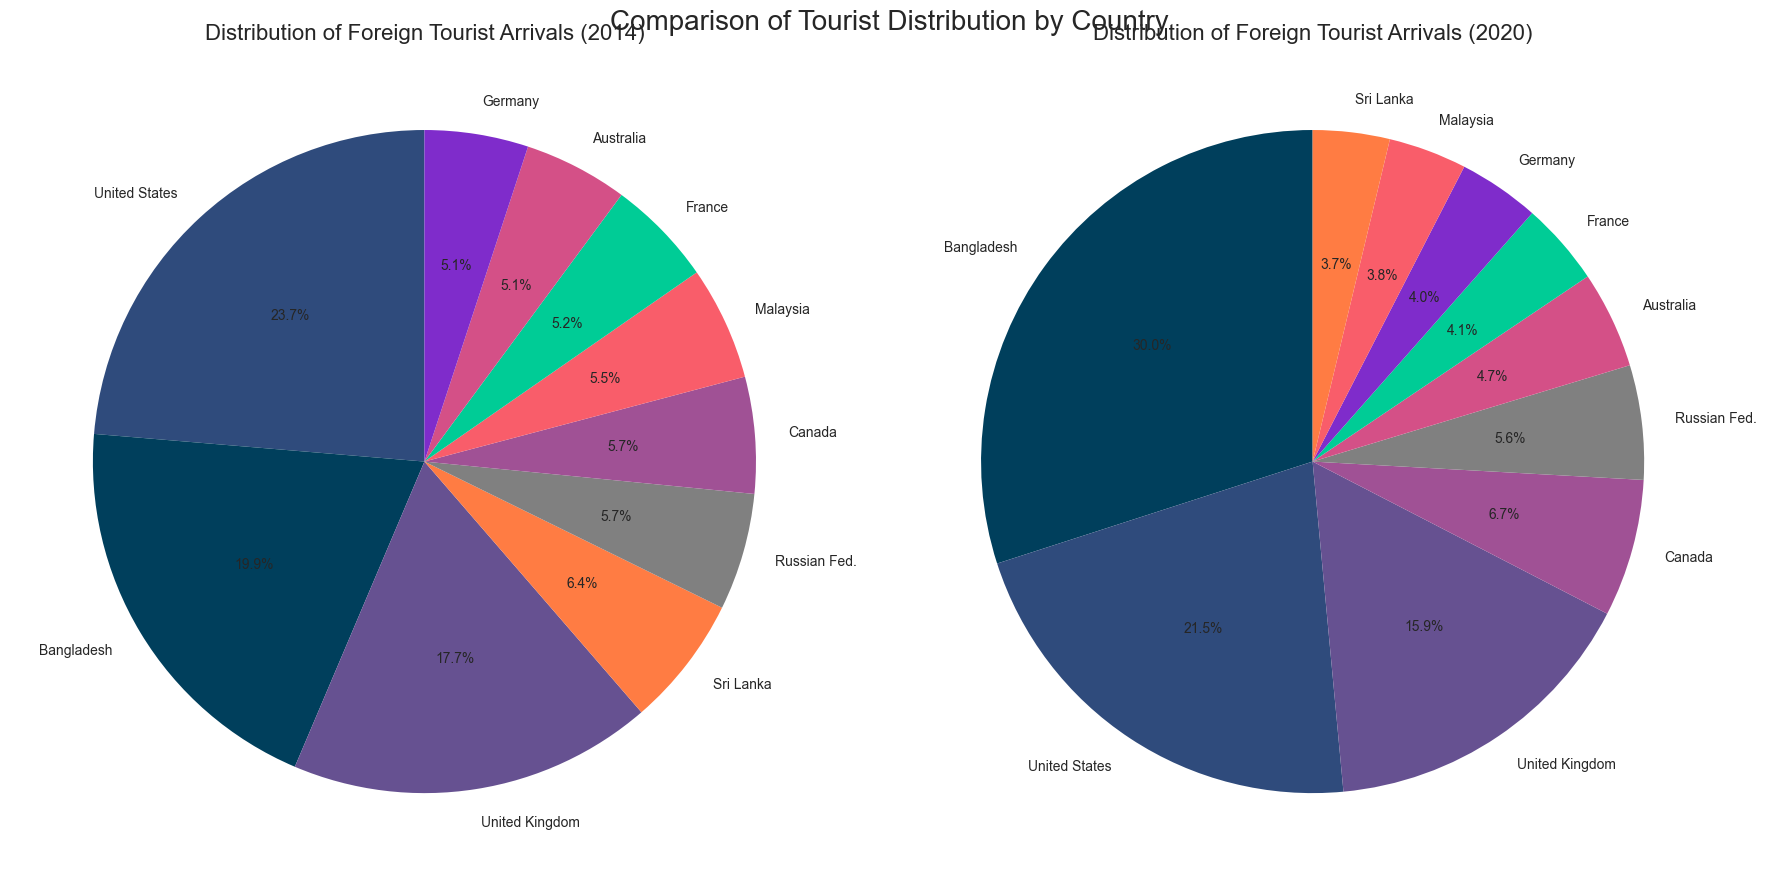

In [14]:
# 4. Pie charts showing the distribution of tourists by country for first and last year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Get the first and last years
first_year = min(df.index)
last_year = max(df.index)

# Create data for the first year
first_year_data = [(df.loc[first_year, f'top{i}_country'], df.loc[first_year, f'top{i}_ftas']) 
                    for i in range(1, 11)]

# Sort by number of tourists (descending)
first_year_data.sort(key=lambda x: x[1], reverse=True)

# Extract countries and FTAs
first_year_countries = [item[0] for item in first_year_data]
first_year_ftas = [item[1] for item in first_year_data]

# Create a pie chart for the first year
ax1.pie(first_year_ftas, labels=first_year_countries, autopct='%1.1f%%', startangle=90,
        colors=[country_colors.get(country, "#808080") for country in first_year_countries])
ax1.set_title(f'Distribution of Foreign Tourist Arrivals ({first_year})', fontsize=16)

# Create data for the last year
last_year_data = [(df.loc[last_year, f'top{i}_country'], df.loc[last_year, f'top{i}_ftas']) 
                    for i in range(1, 11)]

# Sort by number of tourists (descending)
last_year_data.sort(key=lambda x: x[1], reverse=True)

# Extract countries and FTAs
last_year_countries = [item[0] for item in last_year_data]
last_year_ftas = [item[1] for item in last_year_data]

# Create a pie chart for the last year
ax2.pie(last_year_ftas, labels=last_year_countries, autopct='%1.1f%%', startangle=90,
        colors=[country_colors.get(country, "#808080") for country in last_year_countries])
ax2.set_title(f'Distribution of Foreign Tourist Arrivals ({last_year})', fontsize=16)

plt.suptitle('Comparison of Tourist Distribution by Country', fontsize=20, y=0.98)
plt.tight_layout()
plt.savefig('tourist_distribution_pie_charts.png', dpi=300)
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_11956\3666041599.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.fillna(15)


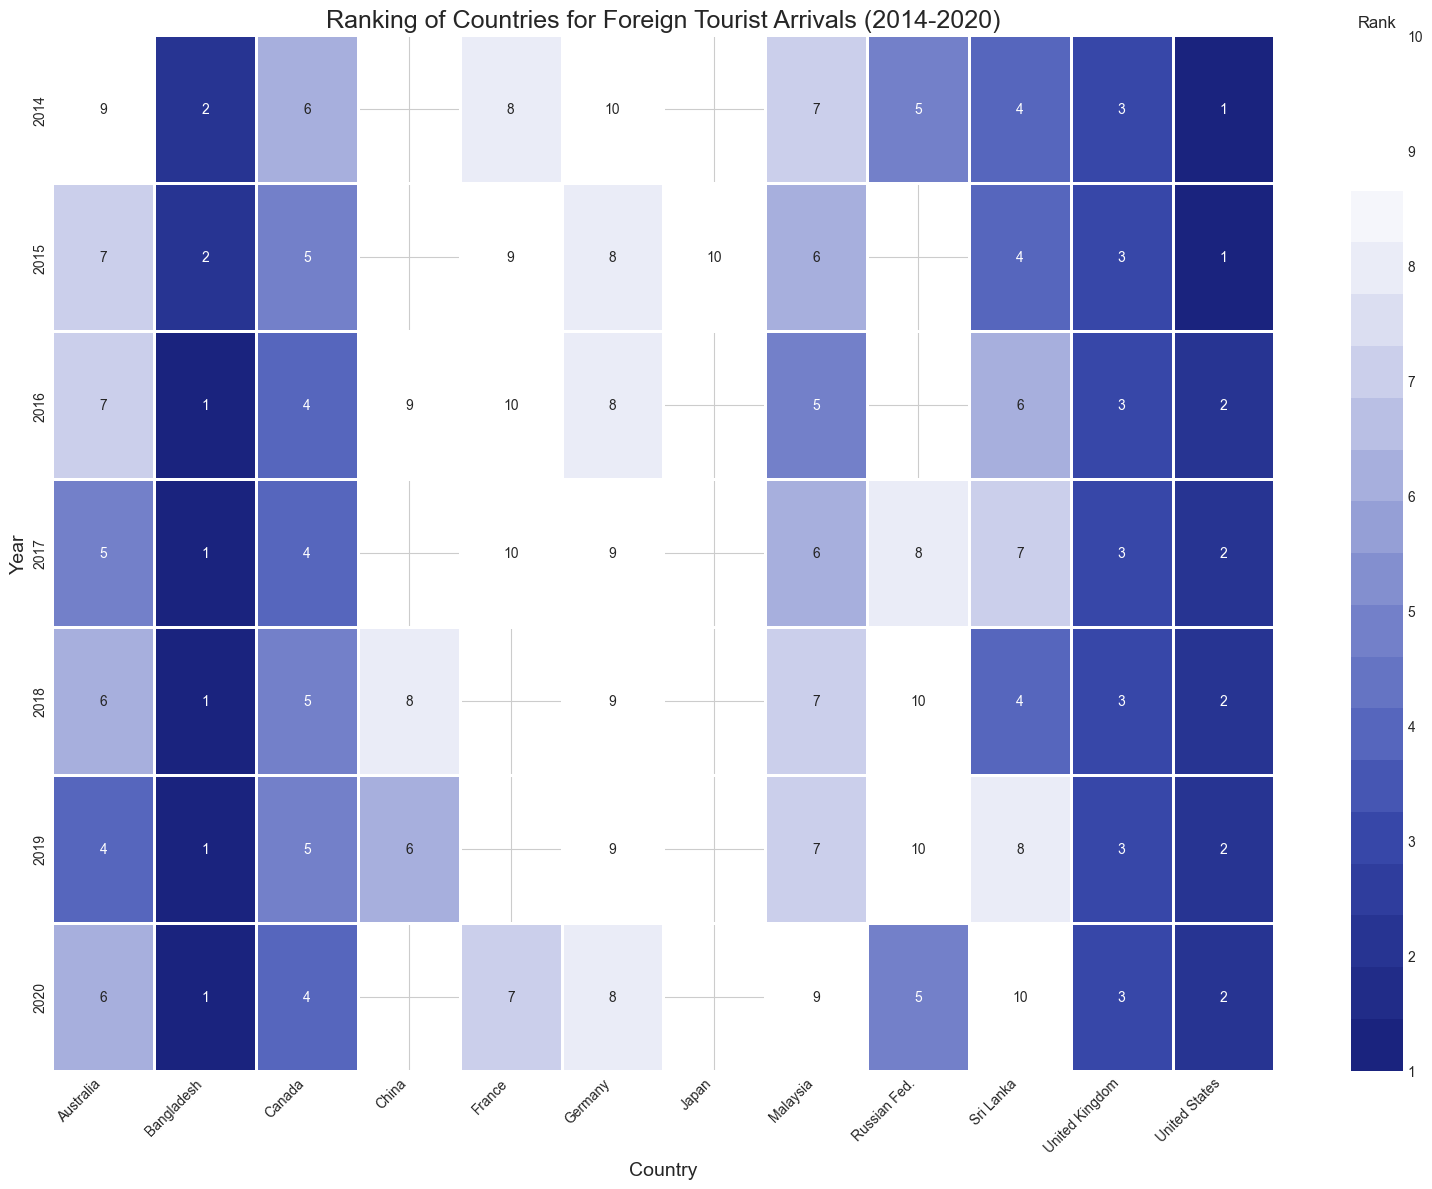

In [15]:
# 5. Heatmap showing the ranking of each country across years
plt.figure(figsize=(16, 12))

# Get the unique countries that appeared in at least one top 10
unique_countries = analysis_results['unique_countries']

# Create a dataframe to store the rankings
heatmap_data = pd.DataFrame(index=sorted(df.index), columns=unique_countries)

# Fill in the rankings
for year in sorted(df.index):
    for i in range(1, 11):
        country = df.loc[year, f'top{i}_country']
        if country in unique_countries:
            heatmap_data.loc[year, country] = i

# Fill NaN values with a value outside our rank range (higher than 10)
heatmap_data = heatmap_data.fillna(15)

# Define a custom colormap - dark colors for high ranks (1-3), lighter for lower ranks
colors = ['#1a237e', '#283593', '#3949ab', '#5c6bc0', '#7986cb', 
            '#9fa8da', '#c5cae9', '#e8eaf6', '#ffffff', '#ffffff']
cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=20)

# Create the heatmap
sns.heatmap(heatmap_data, cmap=cmap, linewidths=1, linecolor='white',
            mask=heatmap_data > 10,  # Mask values > 10 (not in top 10)
            annot=True, fmt='.0f', vmin=1, vmax=10)

plt.title('Ranking of Countries for Foreign Tourist Arrivals (2014-2020)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a color bar legend
cbar = plt.gcf().axes[-1]
cbar.set_title('Rank', fontsize=12)

plt.tight_layout()
plt.savefig('country_ranking_heatmap.png', dpi=300)
plt.show()

In [16]:
# 1. Interactive stacked bar chart
# Pivot the long-form data to get countries as columns
pivot_df = df_long.pivot_table(index='year', columns='country', values='ftas', aggfunc='sum')

# Reset index to make year a column
pivot_df = pivot_df.reset_index()

# Create a stacked bar chart
fig_stacked = go.Figure()

# Add bars for each country
for country in pivot_df.columns[1:]:  # Skip the 'year' column
    fig_stacked.add_trace(go.Bar(
        x=pivot_df['year'],
        y=pivot_df[country],
        name=country,
        marker_color=country_colors.get(country, "#808080")
    ))

# Update layout
fig_stacked.update_layout(
    title='Foreign Tourist Arrivals to India by Country (2014-2020)',
    xaxis_title='Year',
    yaxis_title='Number of Tourists',
    legend_title='Country',
    barmode='stack',
    hovermode='x unified'
)

# Save the figure as an HTML file
fig_stacked.show()

In [17]:
# 2. Interactive line chart with range slider
# Get the consistent countries
top_countries = analysis_results['consistent_countries'][:8]  # Top 8 for readability

# Create a filtered dataframe with only these countries
filtered_df = df_long[df_long['country'].isin(top_countries)]

# Pivot to get one line per country
trend_df = filtered_df.pivot_table(index='year', columns='country', values='ftas', aggfunc='sum')
trend_df = trend_df.reset_index()

# Create a figure with subplots and a range slider
fig_trend = go.Figure()

# Add a line for each country
for country in top_countries:
    if country in trend_df.columns[1:]:  # Skip the 'year' column
        fig_trend.add_trace(go.Scatter(
            x=trend_df['year'],
            y=trend_df[country],
            mode='lines+markers',
            name=country,
            marker=dict(size=10),
            line=dict(width=3, color=country_colors.get(country, "#808080"))
        ))

# Update layout
fig_trend.update_layout(
    title='Trend of Foreign Tourist Arrivals from Top Countries (2014-2020)',
    xaxis_title='Year',
    yaxis_title='Number of Tourists',
    legend_title='Country',
    hovermode='x unified',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='linear'
    )
)

# Save the figure as an HTML file
fig_trend.show()

In [18]:
# 3. Interactive country ranking visualization
# Create a new dataframe for the ranking data
rank_data = []

for year in sorted(df.index):
    for i in range(1, 11):
        country = df.loc[year, f'top{i}_country']
        ftas = df.loc[year, f'top{i}_ftas']
        
        rank_data.append({
            'year': year,
            'rank': i,
            'country': country,
            'ftas': ftas
        })

rank_df = pd.DataFrame(rank_data)

# Create a bubble chart where bubble size represents FTAs
fig_bubble = px.scatter(
    rank_df,
    x='year',
    y='rank',
    size='ftas',
    color='country',
    hover_name='country',
    text='country',
    size_max=60,
    color_discrete_map=country_colors,
    title='Country Rankings by Foreign Tourist Arrivals (2014-2020)'
)

# Update layout
fig_bubble.update_layout(
    xaxis_title='Year',
    yaxis_title='Rank',
    yaxis=dict(
        autorange='reversed',  # Invert y-axis so that rank 1 is at the top
        tickvals=list(range(1, 11)),
        ticktext=[f'#{i}' for i in range(1, 11)]
    ),
    xaxis=dict(
        tickvals=sorted(df.index)
    ),
    hovermode='closest'
)

# Save the figure as an HTML file
fig_bubble.show()

In [19]:
# 4. Interactive Choropleth Map showing tourist arrivals by country
# Get the latest year data
latest_year = max(df.index)

# Create a dataframe with country and tourist count for the latest year
map_data = []

for i in range(1, 11):
    country = df.loc[latest_year, f'top{i}_country']
    ftas = df.loc[latest_year, f'top{i}_ftas']
    
    # Rename some countries to match Plotly's naming convention
    if country == "United States":
        country = "United States of America"
    elif country == "Russia":
        country = "Russian Federation"
    elif country == "Korea":
        country = "South Korea"
    
    map_data.append({
        'country': country,
        'ftas': ftas,
        'rank': i
    })

map_df = pd.DataFrame(map_data)

# Create a choropleth map
fig_map = px.choropleth(
    map_df,
    locations='country',
    locationmode='country names',
    color='ftas',
    hover_name='country',
    color_continuous_scale='Viridis',
    title=f'Top 10 Countries for Foreign Tourist Arrivals to India ({latest_year})',
    labels={'ftas': 'Tourist Arrivals'}
)

# Update layout
fig_map.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    )
)

# Save the figure as an HTML file
fig_map.show()